<img src="pagedegarde.png" height="300" width="1000">

<h2 style ="color : #BF536F ; font-size: 50px; font-weight:900;  text-align: center;text-decoration: underline;"> Partie I (Théorique) </h2>

<h2 style ="color : #3396FF ; font-size: 25px; font-weight:700"> C'est quoi le Segmentation? </h2>


La segmentation d'image est le processus de partitionnement d'une image en plusieurs segments. Le but de la segmentation d'une image est de changer la représentation d'une image en quelque chose de plus significatif et plus facile à analyser. Il est généralement utilisé pour localiser des objets et créer des limites.

Ce n'est pas une bonne idée de traiter une image entière car de nombreuses parties d'une image peuvent ne pas contenir d'informations utiles. Par conséquent, en segmentant l'image, nous pouvons utiliser uniquement les segments importants pour le traitement.

Une image est essentiellement un ensemble de pixels donnés. Dans la segmentation d'image, les pixels qui ont des attributs similaires sont regroupés. La segmentation d'image crée un masque par pixel pour les objets dans une image, ce qui nous donne une compréhension plus complète et granulaire de l'objet.

<h2 style ="color : #3396FF ; font-size: 25px; font-weight:700"> Pourquoi segmenter une image ? </h2>

L'intérêt principal des méthodes de segmentation selon l'approche frontières est de minimiser le nombre d'opérations nécessaires en cas d'itération du processus sur des séries d'images peu différentes les unes des autres (cas des images vidéo notamment).

<h2 style ="color : #3396FF ; font-size: 25px; font-weight:700"> Comment segmenter une image ? </h2>

Dans le cas d'images couleurs, chaque pixel est défini par un triplet (R, G, B) de valeurs, et on ne peut plus se baser sur un seuil simple. Une première possibilité pour segmenter une image couleur est de la convertir en niveaux de gris, et de travailler sur l'image d'intensité.

<h2 style ="color : #3396FF ; font-size: 25px; font-weight:700"> Comment Calculer le seuil d'une image ? </h2>


Ainsi, si un pixel a une valeur supérieure ou égale au seuil (par exemple 150), il prendra la valeur 255 (blanc), et si sa valeur est inférieure (par exemple 100), il prendra la valeur 0 (noir).

<h2 style ="color : #BF536F ; font-size: 50px; font-weight:900;  text-align: center;text-decoration: underline;"> Partie II (Pratique) </h2>

<h2 style ="color : #F78B0B ; font-size: 25px; font-weight:700"> Segmentation avec KMeans </h2>

__K Means est un algorithme de clustering. Les algorithmes de clustering sont des algorithmes non supervisés, ce qui signifie qu'aucune donnée étiquetée n'est disponible. Il est utilisé pour identifier différentes classes ou groupes dans les données données en fonction de la similitude des données.__

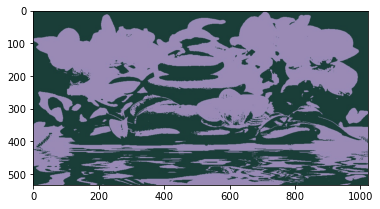

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('fleur.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('fleur.jpg', quant)
plt.imshow(image)

cv2.imread('fleur.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()


<h2 style ="color : #F78B0B ; font-size: 25px; font-weight:700"> Ajouter du Bruit sur l'image </h2>

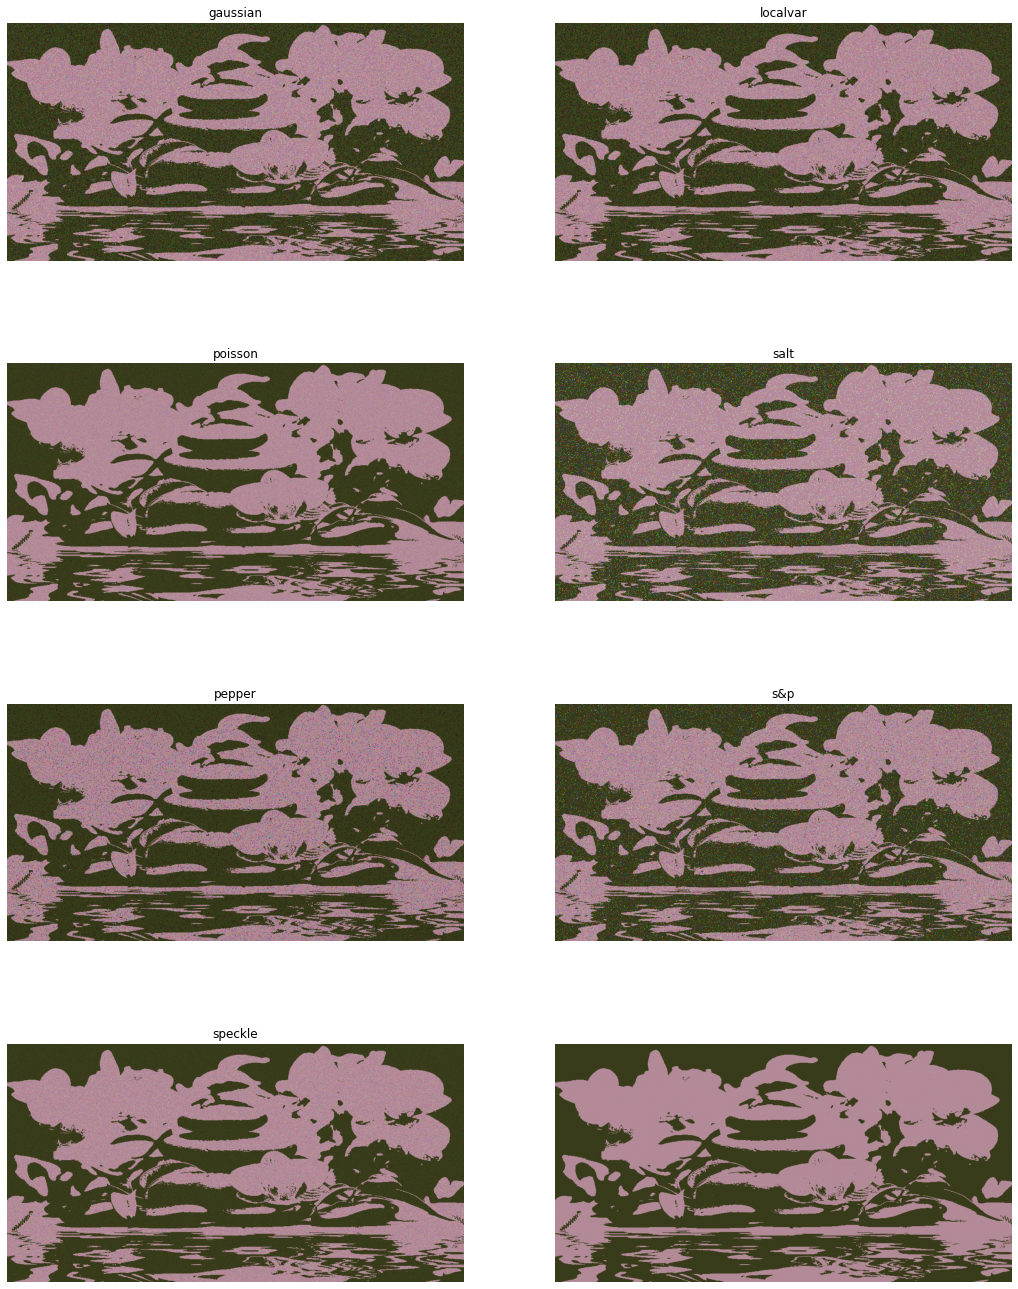

In [2]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

img_path='fleur.jpg'
img = skimage.io.imread(img_path)/255.0
def plotnoise(img, mode,r,c,i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")
plt.show()
plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)

<h2 style ="color : #F78B0B ; font-size: 25px; font-weight:700"> Créer un masque sur une image </h2>

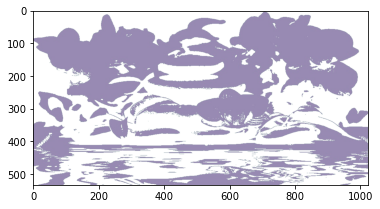

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
image = cv2.imread('fleur.jpg')
img_path='fleur.jpg'
type(image) #Image est un array numpy
mask = image < 87
image[mask]=255
plt.imshow(image, cmap='gray')

<h2 style ="color : #F78B0B ; font-size: 25px; font-weight:700"> Exemple d'utilsation de skimage </h2>

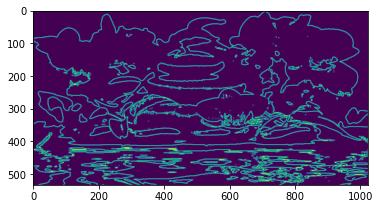

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
from skimage import filters
image = cv2.imread('fleur.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
edges = filters.sobel(image)
plt.imshow(edges)

<h2 style ="color : #F78B0B ; font-size: 25px; font-weight:700"> Utilisation de la méthode "Interact" </h2>

__Le seuillage d'image est une technique simple de binarisation d'image, elle consiste à transformer une image en niveau de gris en une image dont les valeurs de pixels ne peuvent avoir que la valeur 1 ou 0. On parle alors d'une image binaire ou image en noir et blanc.__

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import ipywidgets as widgets
import skimage.io
import matplotlib.pyplot as plt
import cv2
import numpy

img_path='fleur.jpg'
img = skimage.io.imread(img_path)/255.0
def f(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
interact(f,mode=['gaussian','salt','pepper','s&p','speckle','localvar','poisson',None]);

interactive(children=(Dropdown(description='mode', options=('gaussian', 'salt', 'pepper', 's&p', 'speckle', 'l…

<h2 style ="color : #F78B0B ; font-size: 25px; font-weight:700"> Segmentation en utilisant Thresholding </h2>

__Le seuillage d'image est une technique simple de binarisation d'image, elle consiste à transformer une image en niveau de gris en une image dont les valeurs de pixels ne peuvent avoir que la valeur 1 ou 0. On parle alors d'une image binaire ou image en noir et blanc.__

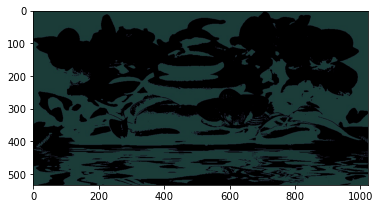

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='fleur.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)
plt.imshow(filtered)